In [85]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [7]:
test_rating = pd.io.parsers.read_csv('raw/rating_test.csv')

In [8]:
content = pd.io.parsers.read_csv('content_recommendations.csv')
content['recs'] = content['recs'].apply(lambda s: map(lambda _s: _s.replace("'","").strip(), s[1:-1].split(',')) )

In [9]:
collaborative = pd.io.parsers.read_csv('collaborative_recommendations.csv')
collaborative['recs'] = collaborative['recs'].apply(lambda s: map(lambda _s: _s.replace("'","").strip(), s[1:-1].split(',')) )
collaborative['size'] = collaborative['recs'].apply(lambda l: len(l))
collaborative = collaborative.loc[collaborative['size'] == 10]

In [93]:
user_ids = list(collaborative['user_id'].unique())
user_results = pd.DataFrame(columns=('user_id','res_cb', 'res_cf', 'res_union'))

for user_id in user_ids:
    # Get the results of the collaborative filtering recommendations
    recommendations_cf = collaborative[collaborative['user_id']==user_id]['recs'].tolist()[0]
    recommendations_cf = set(map(lambda x: int(x), recommendations_cf))
    
    # print(recommendations_cf)
    # Get the results of the content based recommendations
    recommendations_cb = content[content['user_id']==user_id]['recs'].tolist()[0]
    recommendations_cb = set(map(lambda x: int(x), recommendations_cb))
    # print(recommendations_cb)
    # Get the test sample for the user
    watched_animes = test_rating['anime_id'][test_rating['user_id'] == user_id].astype(int).tolist()
    watched_animes = set(watched_animes)
    
    
    union = recommendations_cf.union(recommendations_cb)
    inter = recommendations_cf.intersection(recommendations_cb)
    
    # Get the denominator for the collaborative filtering and content based recommendations
    if len(watched_animes) > 10:
        denom = 10
    else:
        denom = len(watched_animes)
    
    if user_id == 32:
        print watched_animes
        print sorted(recommendations_cb)
        print sorted(recommendations_cf)
    
    # Get the 4 results for each user: number of matches for cf, cb, union and intersection
    res_cf = len(watched_animes.intersection(recommendations_cf)) #* 1.0 / denom
    res_cb = len(recommendations_cb.intersection(watched_animes)) #* 1.0 / denom
    res_union = len(union.intersection(watched_animes)) * 1.0 / min(len(union), len(watched_animes))
    if min(len(inter), len(watched_animes)) != 0:  
        res_intersection = len(inter.intersection(watched_animes)) * 1.0 / min(len(inter), len(watched_animes))
    else: 
        res_intersection = 0.0
        
    user_results = user_results.append({'user_id': user_id, 'res_cb': res_cb, 'res_cf':res_cf, 'res_union':res_union, 'res_inter':res_intersection}, ignore_index=True)

user_results.loc[user_results['res_cb'] >  3]

set([120, 249, 317, 1535])
[249, 2707, 4997, 5231, 12175, 15059, 15783, 20045, 21595, 31289]
[121, 164, 199, 430, 512, 513, 528, 1117, 1118, 1943]


,user_id,res_cb,res_cf,res_union,res_inter


In [52]:
test_rating['anime_id'][test_rating['user_id'] == 32].astype(int).tolist()

[120, 249, 317, 1535]

In [ ]:
abc = pd.DataFrame(index=["user_id", "cf", "cb", "union", "intersection"])

In [83]:
user_results['res_union'].sum() / len(user_results['res_union'])

0.14005513690721097

In [71]:
user_results.loc[user_results['user_id'] == 32]

,user_id,res_cb,res_cf,res_union,res_inter
12,32.0,1.0,0.0,0.25,0.0


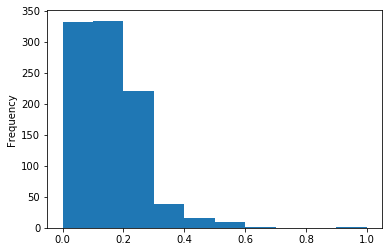

In [95]:
user_results['res_union'].plot(kind="hist",bins=10)
plt.show()